## 1. Importing Libraries and creating datasets

In [121]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## 1.1 Creating datasets

In [122]:
X, y = datasets.make_moons(n_samples=1000, noise=0.1, random_state=42)

In [123]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

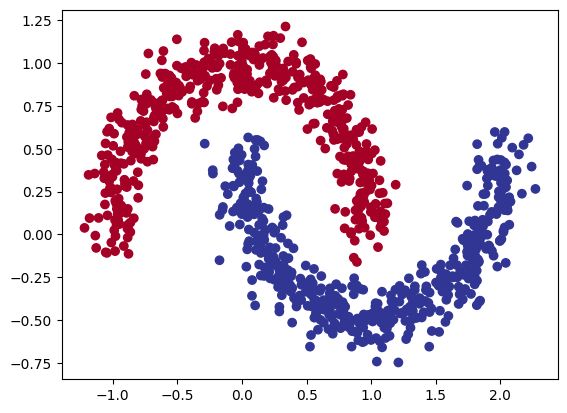

In [124]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## 2. Splitting Datasets into Train and Test / Creating Moon Class

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [127]:
class MoonV1(nn.Module):
     def __init__(self):
          super().__init__()
          self.layer_1 = nn.Linear(in_features=2, out_features=10)
          self.layer_2 = nn.Linear(in_features=10, out_features=10)
          self.layer_3 = nn.Linear(in_features=10, out_features=1)
          self.relu = nn.ReLU()
     def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model = MoonV1().to(device)

In [128]:
# creating Loss and Optimizer functions
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [129]:
# Calculate accuracy

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
     model.train()

     y_logits = model(X_train).squeeze()
     y_pred = torch.round(torch.sigmoid(y_logits))

     loss = loss_fn(y_logits, y_train)

     train_acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

     optimizer.zero_grad()

     loss.backward()

     optimizer.step()

     with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f} | Train Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69525 | Train Acc: 37.62% | Test Loss: 0.69437 | Test Acc: 49.50%
Epoch: 100 | Loss: 0.39179 | Train Acc: 81.12% | Test Loss: 0.40561 | Test Acc: 77.00%
Epoch: 200 | Loss: 0.25076 | Train Acc: 88.25% | Test Loss: 0.24763 | Test Acc: 87.50%
Epoch: 300 | Loss: 0.21226 | Train Acc: 90.62% | Test Loss: 0.20118 | Test Acc: 92.50%
Epoch: 400 | Loss: 0.18059 | Train Acc: 92.38% | Test Loss: 0.16689 | Test Acc: 93.50%
Epoch: 500 | Loss: 0.14095 | Train Acc: 94.00% | Test Loss: 0.12632 | Test Acc: 95.00%
Epoch: 600 | Loss: 0.10097 | Train Acc: 96.75% | Test Loss: 0.08724 | Test Acc: 98.50%
Epoch: 700 | Loss: 0.07167 | Train Acc: 98.25% | Test Loss: 0.05964 | Test Acc: 99.50%
Epoch: 800 | Loss: 0.05275 | Train Acc: 98.88% | Test Loss: 0.04210 | Test Acc: 99.50%
Epoch: 900 | Loss: 0.04082 | Train Acc: 99.12% | Test Loss: 0.03135 | Test Acc: 99.50%


In [131]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


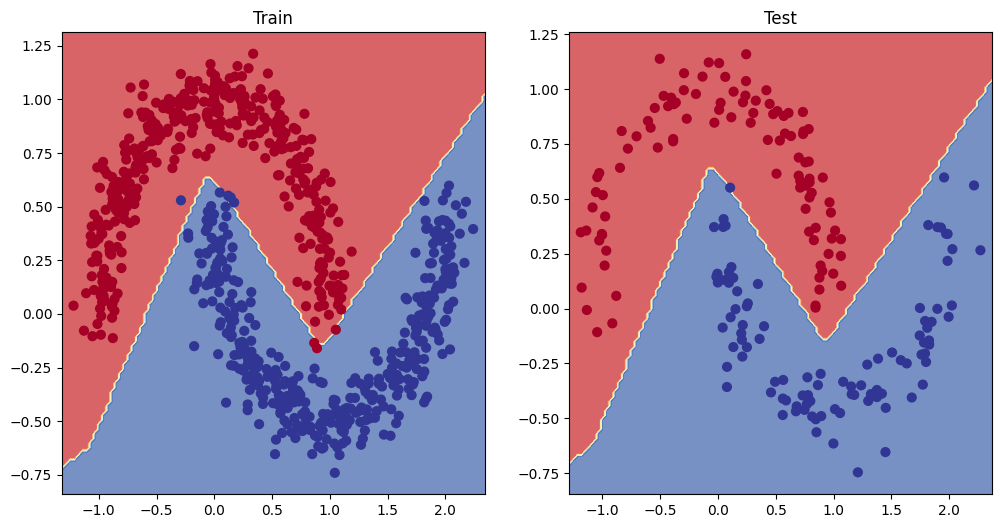

In [133]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [ ]:
with torch.inference_mode():
    y_logits = model(X_test).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

y_pred[:5], y_test[:5]

acc = accuracy_fn(y_true=y_test, y_pred=y_pred)
acc